In [1]:
import pandas as pd
import numpy as np
import math
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from wordcloud import WordCloud, STOPWORDS
warnings.filterwarnings('ignore')
from textblob import TextBlob
from spellchecker import SpellChecker
spell = SpellChecker()
import scipy.stats as ss
import itertools
from sklearn import preprocessing
import scipy.stats as stats
%matplotlib inline

c:\Users\uif46868\Anaconda3\envs\MWML\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\uif46868\Anaconda3\envs\MWML\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\uif46868\Anaconda3\envs\MWML\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\uif46868\AppData\Local\Temp\ipykernel_15436\2751660943.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


#### 1. Loading Train and Test data

In [2]:
df_train = pd.read_csv("D:\work\Hackathon\CO2_Estimation\hackathon2023_starter_material\data_folder\co2_emmision_train_data.csv")
df_test = pd.read_csv("D:\work\Hackathon\CO2_Estimation\hackathon2023_starter_material\data_folder\co2_emmision_test_data.csv")

#### 2. Training Data Exploration

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  27549 non-null  float64
 1   Make                                  27549 non-null  object 
 2   Model                                 27549 non-null  object 
 3   Vehicle Class                         27549 non-null  object 
 4   Engine Size (L)                       27226 non-null  float64
 5   Cylinders                             27226 non-null  float64
 6   Transmission                          27549 non-null  object 
 7   Fuel Type                             27329 non-null  object 
 8   Fuel Consumption [City (L/100 km)]    27226 non-null  float64
 9   Fuel Consumption [Hwy (L/100 km)]     27549 non-null  float64
 10  Fuel Consumption [Comb (L/100 km)]    27226 non-null  float64
 11  Fuel Consumptio

#### 2.1 Drop the Missing rows and columns for both numerical and categorical features.

#### 2.1.1 Getting the Numerical and Categorical Features.

In [4]:
cat_cols=df_train.select_dtypes(include=['object']).columns
num_cols = df_train.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type',
       'Fuel Type 1', 'Fuel Consumption Combined Le/100 km', 'Fuel Type 2'],
      dtype='object')
Numerical Variables:
['Year', 'Engine Size (L)', 'Cylinders', 'Fuel Consumption [City (L/100 km)]', 'Fuel Consumption [Hwy (L/100 km)]', 'Fuel Consumption [Comb (L/100 km)]', 'Fuel Consumption [Comb (mpg)]', 'CO2 Emissions (g/km)', 'Motor (kW)', 'Range 1 (km)', 'Recharge Time (h)', 'Range 2 (km)', 'Fuel Consumption [City (kWh/100 km)]', 'Fuel Consumption [Comb (kWh/100 km)]', 'Consumption [City (Le/100 km)]', 'Consumption [Hwy (Le/100 km)]', 'Consumption [Comb (Le/100 km)]', 'Range (km)']


In [5]:
(df_train.isnull().sum()/(len(df_train)))*100

Year                                     0.000000
Make                                     0.000000
Model                                    0.000000
Vehicle Class                            0.000000
Engine Size (L)                          1.172456
Cylinders                                1.172456
Transmission                             0.000000
Fuel Type                                0.798577
Fuel Consumption [City (L/100 km)]       1.172456
Fuel Consumption [Hwy (L/100 km)]        0.000000
Fuel Consumption [Comb (L/100 km)]       1.172456
Fuel Consumption [Comb (mpg)]            1.989183
CO2 Emissions (g/km)                     0.000000
Motor (kW)                              98.010817
Fuel Type 1                             99.183273
Fuel Consumption Combined Le/100 km     99.183273
Range 1 (km)                            99.183273
Recharge Time (h)                       98.010817
Fuel Type 2                             99.183273
Range 2 (km)                            99.183273


In [327]:
df_train_non_missing = df_train[['Make','Model','Vehicle Class','Engine Size (L)','Cylinders','Transmission', 'Fuel Type','Fuel Consumption [City (L/100 km)]','Fuel Consumption [Hwy (L/100 km)]','Fuel Consumption [Comb (L/100 km)]','Fuel Consumption [Comb (mpg)]','CO2 Emissions (g/km)']]

In [328]:
df_train_non_missing = df_train_non_missing.dropna()

In [329]:
X = df_train_non_missing.loc[:,df_train_non_missing.columns != 'CO2 Emissions (g/km)']
y = df_train_non_missing.loc[:,df_train_non_missing.columns == 'CO2 Emissions (g/km)']

In [330]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42)

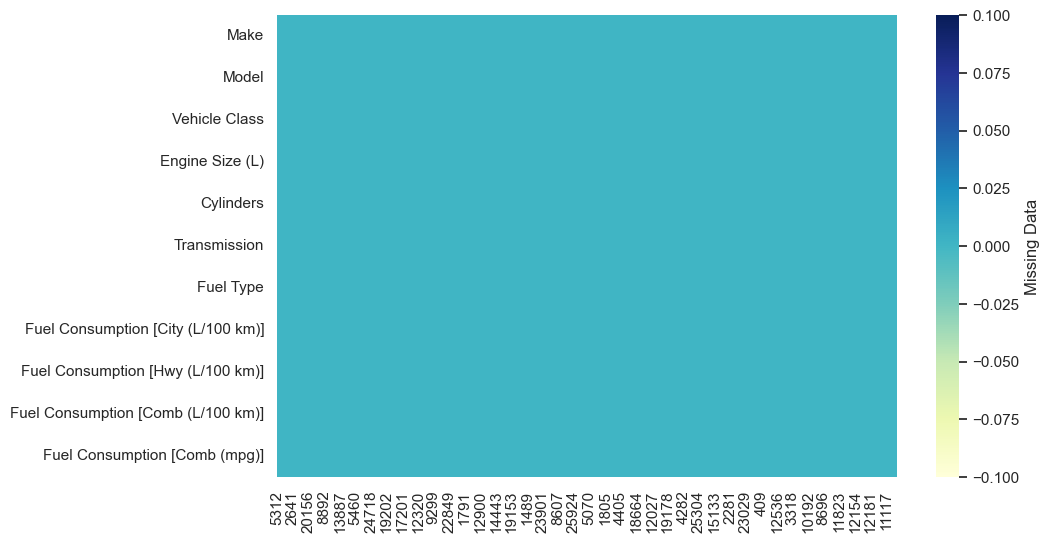

In [331]:
X_val.isnull().sum()
plt.figure(figsize=(10,6))
sns.heatmap(X_val.isnull().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)# 

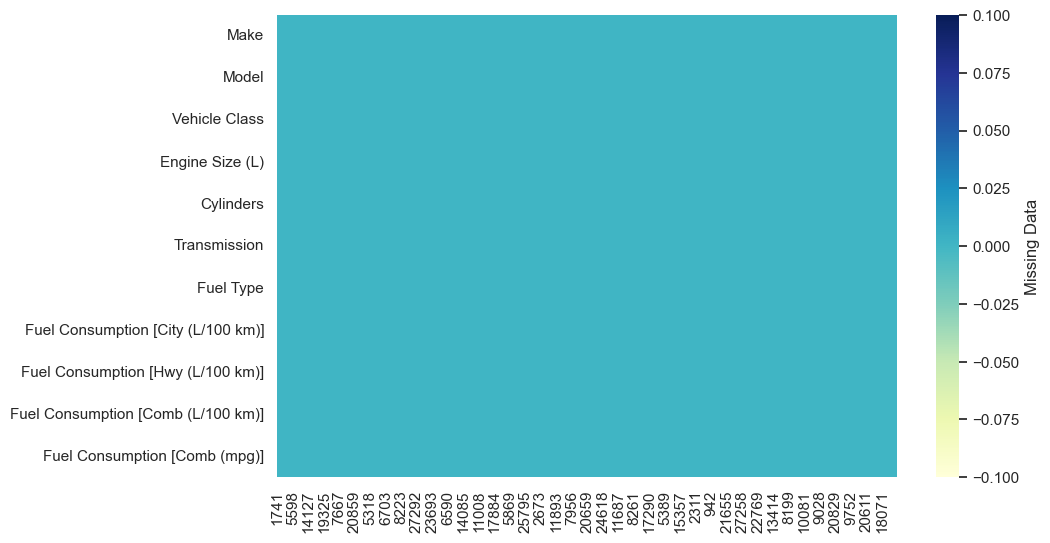

In [332]:
X_train.isnull().sum()
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isnull().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [333]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24300 entries, 1741 to 23654
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Make                                24300 non-null  object 
 1   Model                               24300 non-null  object 
 2   Vehicle Class                       24300 non-null  object 
 3   Engine Size (L)                     24300 non-null  float64
 4   Cylinders                           24300 non-null  float64
 5   Transmission                        24300 non-null  object 
 6   Fuel Type                           24300 non-null  object 
 7   Fuel Consumption [City (L/100 km)]  24300 non-null  float64
 8   Fuel Consumption [Hwy (L/100 km)]   24300 non-null  float64
 9   Fuel Consumption [Comb (L/100 km)]  24300 non-null  float64
 10  Fuel Consumption [Comb (mpg)]       24300 non-null  float64
dtypes: float64(6), object(5)
memory usage:

#### Lets se the unique values for categorical values, we already have an idea abt the scaling of the numerical features


In [334]:
for column in ['Make','Model','Vehicle Class','Transmission','Fuel Type']:
    print(column)
    print("Number of Unique Features : ", len(X_train[column].unique()))

Make
Number of Unique Features :  457
Model
Number of Unique Features :  5043
Vehicle Class
Number of Unique Features :  449
Transmission
Number of Unique Features :  30
Fuel Type
Number of Unique Features :  5


In [335]:
for column in ['Make','Model','Vehicle Class','Transmission','Fuel Type']:
    X_train[column] = ((X_train[column].str.replace('[^a-zA-Z0-9\s]', '', regex=True)). map(str. lower)).str.replace(" ", "")

In [336]:
X_train = X_train.drop(['Model'], axis=1)

In [337]:
Incorrect_2_Correct = {'compatc':'compact','fullsiez':'fullsize','midsiez':'midsize','minicompatc':'minicompact','minivna':'minivan','pickuptruckstandadr':'pickuptruckstandard', 'specialpurposevehicel':'specialpurposevehicle', 'stationwagonmidsiez':'stationwagonmidsize', 'subcompatc':'subcompact','svu':'suv','suvstandadr':'suvstandard','vancarog':'vancargo','vanpassengre':'vanpassenger','twoseatre':'twoseater'}

In [338]:
for key, value in Incorrect_2_Correct.items():
    X_train['Vehicle Class'] = X_train['Vehicle Class'].str.replace(key, value)

<Axes: xlabel='Vehicle Class'>

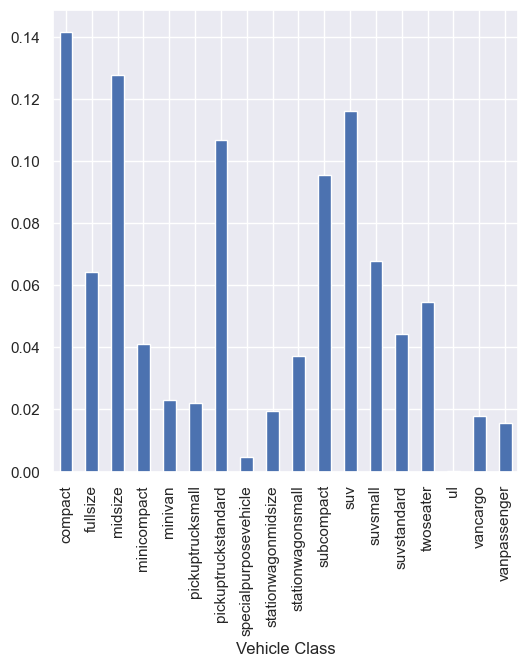

In [339]:
fq = X_train.groupby('Vehicle Class').size()/len(X_train)
X_train.loc[:, "{}_freq_encode".format('Vehicle Class')] = X_train['Vehicle Class'].map(fq)
fq.plot.bar(stacked=True)

In [340]:
Incorrect_2_Correct_Make = {'acuar':'acura','alfaromoe':'alfaromeo','astonmartni':'astonmartin','auid':'audi','bentlye':'bentley','bwm':'bmw','buikc':'buick','cadillca':'cadillac','chevrolte':'chevrolet','chryslre':'chrysler','dodeg':'dodge','eagel':'eagle','ferrair':'ferrari','fita':'fiat','fodr':'ford','gcm':'gmc','genessi':'genesis','honad':'honda','hyundia':'hyundai','infiniit':'infiniti','jagura':'jaguar','jepe':'jeep','kai':'kia','lamborghiin':'lamborghini','landrovre':'landrover','lexsu':'lexus','linconl':'lincoln','maserait':'maserati','mazad':'mazda','mercedesbezn':'mercedesbenz','mercuyr':'mercury','miin':'mini','mitsubisih':'mitsubishi','nissna':'nissan','oldsmobiel':'oldsmobile','plymouht':'plymouth','pontica':'pontiac','porsceh':'porsche','rma':'ram','rollsroyec':'rollsroyce','saab':'saba','satunr':'saturn','scino':'scion','subaur':'subaru','suzuik':'suzuki','toyoat':'toyota','volkswagne':'volkswagen','volov':'volvo'}

In [341]:
for key, value in Incorrect_2_Correct_Make.items():
    X_train['Make'] = X_train['Make'].str.replace(key, value)

<Axes: xlabel='Make'>

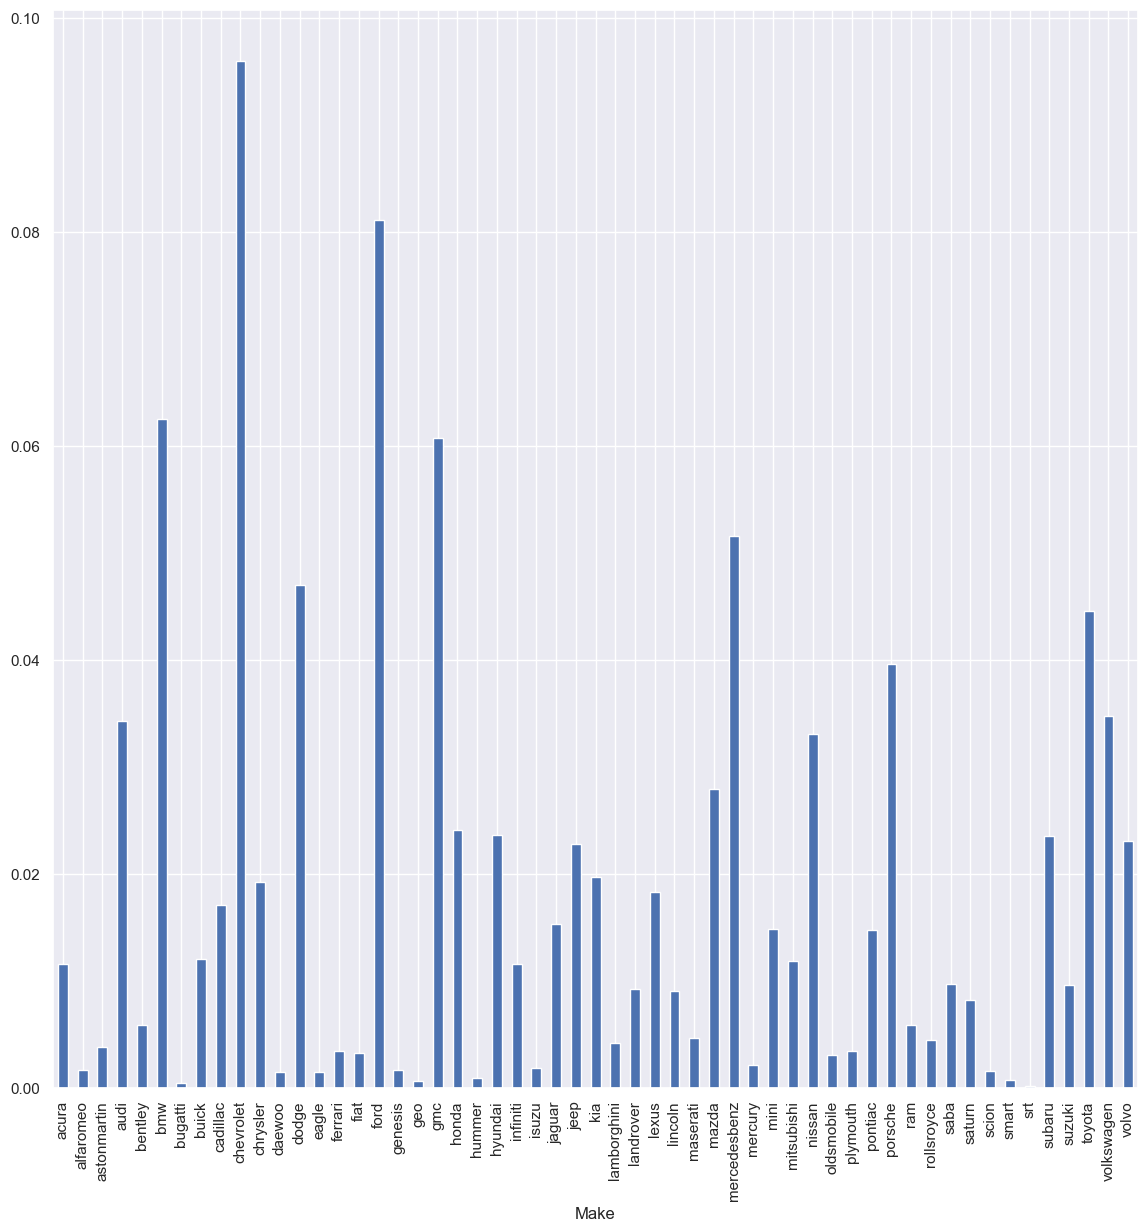

In [342]:
sns.set(rc={'figure.figsize':(14,14)})
fq = X_train.groupby('Make').size()/len(X_train)
X_train.loc[:, "{}_freq_encode".format('Make')] = X_train['Make'].map(fq)
fq.plot.bar(stacked=True)

<Axes: xlabel='Transmission'>

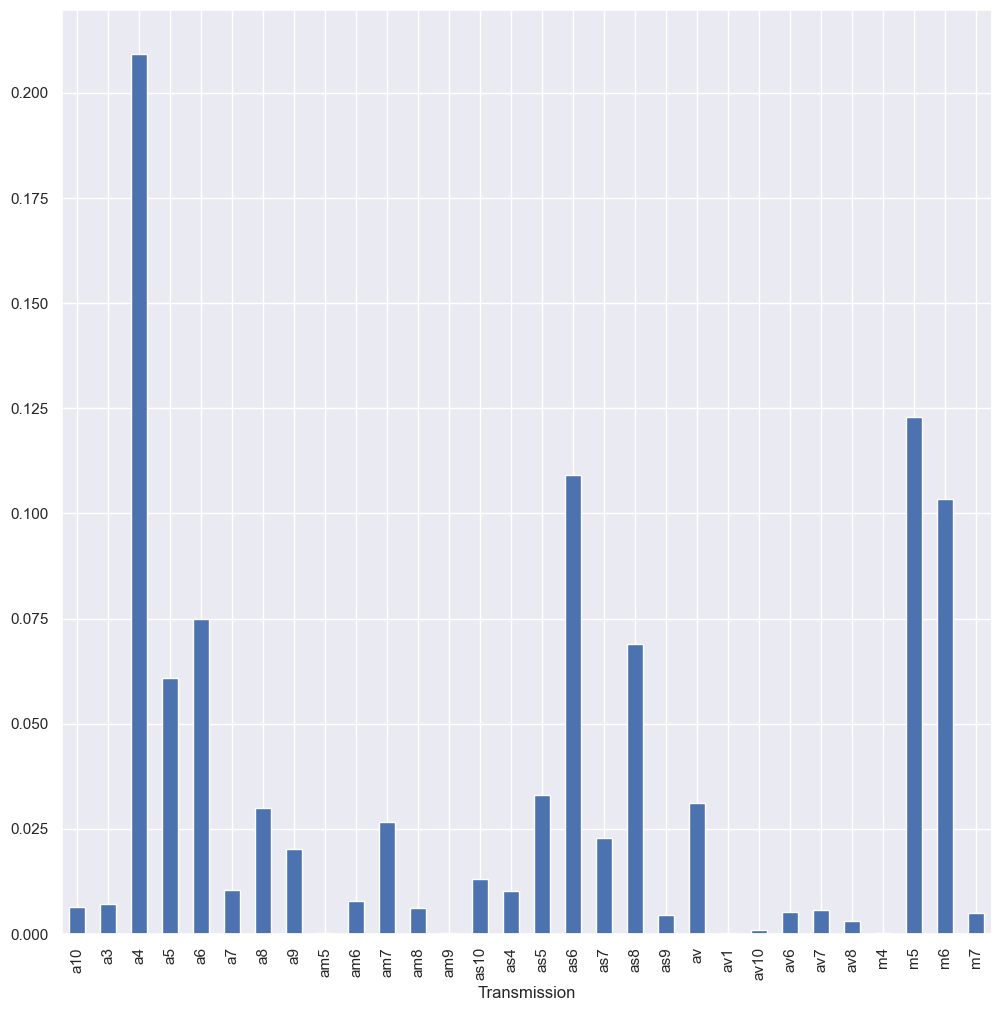

In [343]:
sns.set(rc={'figure.figsize':(12,12)})
fq = X_train.groupby('Transmission').size()/len(X_train)
X_train.loc[:, "{}_freq_encode".format('Transmission')] = X_train['Transmission'].map(fq)
fq.plot.bar(stacked=True)

<Axes: xlabel='Fuel Type'>

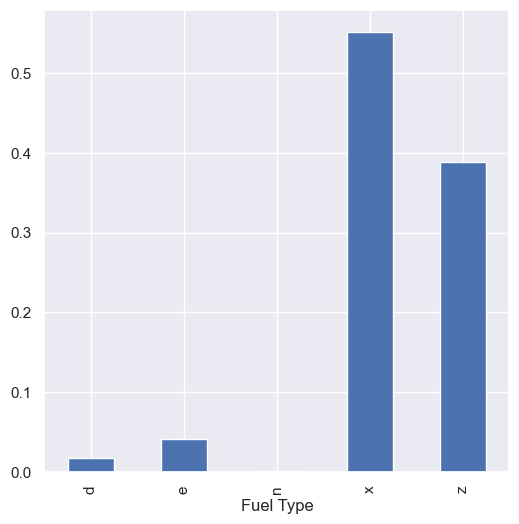

In [344]:
sns.set(rc={'figure.figsize':(6,6)})
fq = X_train.groupby('Fuel Type').size()/len(X_train)
X_train.loc[:, "{}_freq_encode".format('Fuel Type')] = X_train['Fuel Type'].map(fq)
fq.plot.bar(stacked=True)

In [345]:
for column in ['Make','Vehicle Class','Transmission','Fuel Type']:
    print(column)
    print("Number of Unique Features : ", len(X_train[column].unique()))

Make
Number of Unique Features :  55
Vehicle Class
Number of Unique Features :  18
Transmission
Number of Unique Features :  30
Fuel Type
Number of Unique Features :  5


#### Correlation of Categorical Values

In [348]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [358]:
Categorical_Names_1 = ['Make','Vehicle Class','Transmission','Fuel Type']
Categorical_Names_2 = ['Make','Vehicle Class','Transmission','Fuel Type']
for cat_1 in Categorical_Names_1:
    for cat_2 in Categorical_Names_2:
        confusion_matrix = pd.crosstab(X_train[cat_1], X_train[cat_2])
        if cramers_v(confusion_matrix.values) != 1:
            print("Correlation Between : ", cat_1, " and ", cat_2, "is ", cramers_v(confusion_matrix.values))

Correlation Between :  Make  and  Vehicle Class is  0.3138111521633797
Correlation Between :  Make  and  Transmission is  0.30446378193304746
Correlation Between :  Make  and  Fuel Type is  0.43648932678401103
Correlation Between :  Vehicle Class  and  Make is  0.3138111521633797
Correlation Between :  Vehicle Class  and  Transmission is  0.22884046358734858
Correlation Between :  Vehicle Class  and  Fuel Type is  0.28932460250294506
Correlation Between :  Transmission  and  Make is  0.30446378193304746
Correlation Between :  Transmission  and  Vehicle Class is  0.22884046358734858
Correlation Between :  Transmission  and  Fuel Type is  0.30985171132514816
Correlation Between :  Fuel Type  and  Make is  0.436489326784011
Correlation Between :  Fuel Type  and  Vehicle Class is  0.289324602502945
Correlation Between :  Fuel Type  and  Transmission is  0.3098517113251481


#### Correlation of Categorical and Numerical Values

In [360]:
le = preprocessing.LabelEncoder()

In [361]:
X_train['Make'] = le.fit_transform(X_train['Make'])
X_train['Vehicle Class']= le.fit_transform(X_train['Vehicle Class'])
X_train['Transmission']= le.fit_transform(X_train['Transmission'])
X_train['Fuel Type']= le.fit_transform(X_train['Fuel Type'])

In [365]:
print(stats.pointbiserialr(X_train['Make'], y_train['CO2 Emissions (g/km)']))
print(stats.pointbiserialr(X_train['Vehicle Class'], y_train['CO2 Emissions (g/km)']))
print(stats.pointbiserialr(X_train['Transmission'], y_train['CO2 Emissions (g/km)']))
print(stats.pointbiserialr(X_train['Fuel Type'], y_train['CO2 Emissions (g/km)']))

PointbiserialrResult(correlation=-0.2298234297906866, pvalue=1.0783186920904403e-288)
PointbiserialrResult(correlation=0.2782573730627103, pvalue=0.0)
PointbiserialrResult(correlation=-0.3204036447110941, pvalue=0.0)
PointbiserialrResult(correlation=0.049482061051303323, pvalue=1.1833544317010778e-14)
